# Problem Statement

**Goal: Given a list of countries and OD matrix, minimize the distance traveled through all of those countries using Hill Climbing and Simulated Annealing.**

In [258]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd 
import time

## Part 1. Create a database

In [187]:
class Distance (object):
  def __init__(self,country, othercountries, distance):
      self.country = country
      self.othercountries = othercountries
      self.distance = distance

In [188]:
def findcompnum(mymap, country):
    for i in range (0,len(mymap)):
        if mymap[i].country==country:
            return(i)
    return(-1)

In [203]:
def finddistance(mymap, countrya, countryb):
    a = findcompnum(mymap, countrya)
    b = mymap[a].othercountries.index(countryb)
    distance = mymap[a].distance[b]
    return distance

In [190]:
def readmymapdata(mymap, path):
    mymapsheet   = pd.read_excel(path, sheet_name = 0, header=None)
    for i in range(0, len(mymapsheet)):
        countryA = mymapsheet[0][i]
        compnum = findcompnum(mymap, countryA)
        distance = []
        othercountries = []
        countryB = mymapsheet[1][i]
        distAtoB = mymapsheet[2][i]
        if compnum == -1:
            othercountries.append(countryB)
            distance.append(distAtoB)
            mymap.append(Distance(countryA,othercountries,distance))

        else:
            mymap[compnum].othercountries.append(countryB)
            mymap[compnum].distance.append(distAtoB)
            

In [195]:
def createcountries(mymap,startcountry):
    countrylist = []
    for i in range(0, len(mymap)):
        if mymap[i].country != startcountry:
            countrylist.append(mymap[i].country)
    return countrylist

In [352]:
# # test
# mymapsheet   = pd.read_excel('Country6Distances.xlsx', sheet_name = 0, header=None)
# path = 'Country6Distances.xlsx'
# mymap = []
# readmymapdata(mymap, path)
# for i in range(0, len(mymap)):
#     print(mymap[i].country)
#     print(mymap[i].othercountries)
#     print(mymap[i].distance)
#     print('\n')

## Part 2. Create a random solution to the traveling salesman problem. 

Set a seed so that you always start with the same solution. Once you have your solution, remove the seed so the rest is random.

In [196]:
def createsolution(mymap,startcountry):    
    destinations = createcountries(mymap,startcountry)
    solution = destinations[:] # make a copy
    random.shuffle(solution)
    return solution
    
# createsolution(mymap,startcountry='BRA')

## Part 3. Objective function for TSP
Create a function to determine the objective value of any solution to the TSP

Note: For some heuristics, you may need to create a feasibility checker like we did for the knapsack, but for the TSP you do not need one.

In [197]:
def getz(mymap,startcountry,solution):
    z = 0
    for i in range(0,len(solution)):
        if i == 0:
            z += finddistance(mymap,startcountry, solution[i])
        else:
            z += finddistance(mymap,solution[i-1], solution[i])
    z += finddistance(mymap,solution[-1], startcountry)
    return z

In [344]:
# # test
# startcountry = 'USA'
# solution = createsolution(mymap,startcountry)
# z = getz(mymap,startcountry,solution)
# print(solution)
# print(z)

## Part 4. Create a neighborhood
Create a two swap neighborhood or a second different neighborhood that has a bigger solution space. E.g. 3 swap, 4 swap, cross paths or something else.

In [350]:
def findneighborhood(cursol, swap=3):
    '''
    swap: number of countries that get swapped. Default value is 3. Other value is 2. 
    '''
    if swap == 3:
        swapcountries = random.sample(cursol, k = 3) # randomly pick 3 countries out of the cursol
        neighsol = cursol[:]

        loc0 = neighsol.index(swapcountries[0])
        loc1 = neighsol.index(swapcountries[1])
        loc2 = neighsol.index(swapcountries[2])
        
        neighsol[loc0] = swapcountries[2]
        neighsol[loc1] = swapcountries[0]
        neighsol[loc2] = swapcountries[1]
    if swap == 2:
        swapcountries = random.sample(cursol, k = 2)
        neighsol = cursol[:]
    
        loc0 = neighsol.index(swapcountries[0])
        loc1 = neighsol.index(swapcountries[1])

        neighsol[loc0] = swapcountries[1]
        neighsol[loc1] = swapcountries[0]
        
    return neighsol

# neighsol = findneighborhood(solution)
# print(solution)
# print(neighsol)

In [347]:
# # test
# z = getz(mymap,startcountry,neighsol)
# print(z)

## Part 5. Build a hill climbing algorithm.  
You can assume that you are at a local optimal solution if you have performed 1500 swaps with no improvement.  Undergraduates just run 2 swap. Grad students run both of your neighborhoods and provide the solutions, include the running time if it is longer than 10 seconds.

In [348]:

def hillclimbing(maxtries=1500, runs=100, swap = 3, runstatus = False, graph = False):
    # Start time
    start_time = time.time()
    
    # get data
    path = 'CountryDistances.xlsx'
    mymap = []
    readmymapdata(mymap, path)
    startcountry = 'USA'

    zbest = 1000000
    bestol = []
    
    for run in range(0,runs): 
        tries=0
        totaltries=0
        graphz=[]
        
        cursol = createsolution(mymap,startcountry)
        zcur = getz(mymap,startcountry,cursol)
        
        while tries < maxtries:
            tries += 1
            totaltries += 1
            graphz.append(zcur)
            neighsol = findneighborhood(cursol, swap)
            zneigh = getz(mymap,startcountry,neighsol)
            if zneigh < zcur:
                zcur = zneigh
                cursol = neighsol[:] 
                tries = 0
                if zcur < zbest:
                    zbest = zcur
                    bestsol = cursol[:]
                    if runstatus == True:
                        print ('run', run, 'iter ', totaltries, ' zbest ', zbest)
    if graph == True:
        fig=plt.figure()
        ax=fig.add_subplot(111)
        ax.plot(graphz, color = 'r',label='Existing')
        ax.legend(loc='best')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Z Value')
        ax.set_title('Hill Climbing')
        #plt.ion()
        plt.show()
    
    # End time
    end_time = time.time()
    
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'Hill climbing with {swap}-swap neighborhood for {maxtries} tries.')
    print(f'Execution time: {elapsed_time:.2f} seconds \n')
    print('Best solution using Hill Climbing: \n',bestsol)
    print('Z best using Hill Climbing: ',zbest,'\n')

### Part 5.1 Run hill climbing

#### 5.1.1 Hill climbing 3-Swap Neighborhood

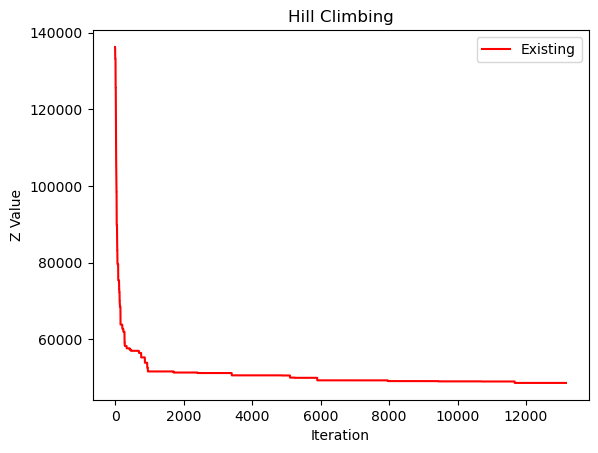

Hill climbing with 3-swap neighborhood for 1500 tries.
Execution time: 36.73 seconds 

Best solution using Hill Climbing: 
 ['ICE', 'NOR', 'POL', 'GMY', 'CZE', 'SWD', 'FIN', 'EST', 'HUN', 'AUS', 'GRC', 'SWZ', 'SPN', 'POR', 'UK', 'FRN', 'IRE', 'CAN', 'BHM', 'HAI', 'VEN', 'TRI', 'PER', 'BOL', 'PAR', 'ARG', 'BRA', 'COL', 'ECU', 'PAN', 'COS', 'HON', 'GUA', 'MEX', 'BLZ', 'CUB']
Z best using Hill Climbing:  30541 



In [322]:
hillclimbing(maxtries=1500, runs=100, swap=3, runstatus = False, graph = True)

#### 5.1.1 Hill climbing 2-Swap Neighborhoood

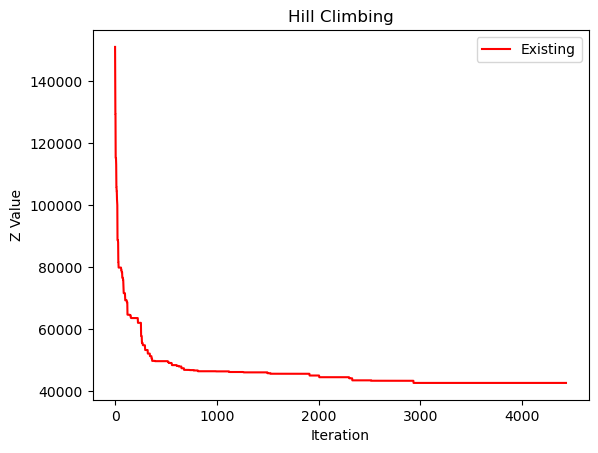

Hill climbing with 2-swap neighborhood for 1500 tries.
Execution time: 22.90 seconds 

Best solution using Hill Climbing: 
 ['MEX', 'GUA', 'BLZ', 'HON', 'COS', 'PAN', 'COL', 'VEN', 'TRI', 'HAI', 'BHM', 'CAN', 'ICE', 'IRE', 'UK', 'FRN', 'NOR', 'SWD', 'FIN', 'EST', 'POL', 'GMY', 'CZE', 'AUS', 'HUN', 'GRC', 'SWZ', 'SPN', 'POR', 'BRA', 'PAR', 'ARG', 'BOL', 'PER', 'ECU', 'CUB']
Z best using Hill Climbing:  28987 



In [323]:
hillclimbing(maxtries=1500, runs=100, swap=2, runstatus = False, graph = True)

### Comments
- 2-swap is better than 3-swap in both time and z best. hmmm why.

## Part 6. Build a simulated annealing algorithm


In [351]:
def annealing(maxiter=100000, swap=3, runstatus = False, graph = False):
    '''
    runstatus: prints out progress but makes the results look kinda long
    graph: shows a graph at the end
    '''
    # get data
    path = 'CountryDistances.xlsx'
    mymap = []
    readmymapdata(mymap, path)
    startcountry = 'USA'
    
    # Start time
    start_time = time.time()
    
    # maxiter=10000000
    bestsol =[]
    zbest = 1000000
    
    # tries=0
    totaltries=0
    graphz=[]
    graphbest=[]

    cursol = createsolution(mymap,startcountry)
    zcur = getz(mymap,startcountry,cursol)
    
    for itera in range (0,maxiter):
        if itera%100000==0 and runstatus == True:
            print(itera, zbest)
        # tries+=1
        totaltries+=1
        
        if totaltries >=100:
            graphz.append(zcur)
            graphbest.append(zbest)
        neighsol = findneighborhood(cursol,swap)
        zneigh = getz(mymap,startcountry,neighsol)
        if zneigh < zcur: 
            zcur = zneigh
            cursol = neighsol[:]
            # tries = 0
            if zcur < zbest:
                zbest = zcur
                bestsol = cursol[:]
                if runstatus == True:
                    print ('run', itera, 'iter ', totaltries, ' zbest ', zbest)
        else:
            if random.random()<.5*pow(math.e,math.log(.02)/maxiter*itera):
                zcur=zneigh
                cursol = neighsol[:]

    if graph == True:
        # Make a figure
        fig=plt.figure()
        #Add 2 different graphs
        ax=fig.add_subplot(111)
        ax.plot(graphz, color = 'r',label='Existing')
        ax.plot(graphbest, color = 'b',label='Best')
        ax.legend(loc="best")
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Z Value')
        ax.set_title('Annealing')
        #plt.ion()
        plt.show()    
    
    # End time
    end_time = time.time()
    
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'Simulated annealing with {swap}-swap neighborhood for {maxiter} iterations.')
    print(f'Execution time: {elapsed_time:.2f} seconds \n')
    print('Best solution using Hill Climbing: \n',bestsol)
    print('Z best using Hill Climbing: ',zbest,'\n')

In [349]:
def annealingwithruns(maxiter=100000, swap=3, runs = 100, runstatus = False, graph = False):
    # get data
    path = 'CountryDistances.xlsx'
    mymap = []
    readmymapdata(mymap, path)
    startcountry = 'USA'
    
    # Start time
    start_time = time.time()
    
    bestsol =[]
    zbest = 1000000
    totaltries=0
    graphz=[]
    graphbest=[]

    for run in range (0,runs):
        # random restart in between
        cursol = createsolution(mymap,startcountry)
        zcur = getz(mymap,startcountry,cursol)
        
        for itera in range (0,maxiter):
            if itera%100000==0 and runstatus == True:
                print(itera, zbest)
            totaltries+=1
            
            if totaltries >=1000: # need to do something with the totaltries to get the graph look right?
                graphz.append(zcur)
                graphbest.append(zbest)
            neighsol = findneighborhood(cursol,swap)
            zneigh = getz(mymap,startcountry,neighsol)
            if zneigh < zcur: 
                zcur = zneigh
                cursol = neighsol[:]
                # tries = 0
                if zcur < zbest:
                    zbest = zcur
                    bestsol = cursol[:]
                    if runstatus == True:
                        print ('run', itera, 'iter ', totaltries, ' zbest ', zbest)
            else:
                if random.random()<.5*pow(math.e,math.log(.02)/maxiter*itera):
                    zcur=zneigh
                    cursol = neighsol[:]

    if graph == True:
        # Make a figure
        fig=plt.figure()
        #Add 2 different graphs
        ax=fig.add_subplot(111)
        ax.plot(graphz, color = 'r',label='Existing')
        ax.plot(graphbest, color = 'b',label='Best')
        ax.legend(loc="best")
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Z Value')
        ax.set_title('Annealing')
        #plt.ion()
        plt.show()    
    
    # End time
    end_time = time.time()
    
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'Simulated annealing with {swap}-swap neighborhood for {maxiter} iterations.')
    print(f'Execution time: {elapsed_time:.2f} seconds \n')
    print('Best solution using Hill Climbing: \n',bestsol)
    print('Z best using Hill Climbing: ',zbest,'\n')

### Part 6.1 Run simulated annealing

#### Part 6.1.1 2-swap neighborhood, 100,000 iterations.

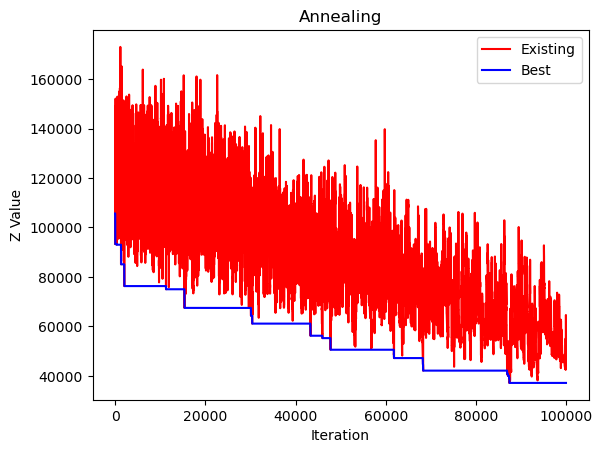

Simulated annealing with 2-swap neighborhood for 100000 iterations.
Execution time: 4.51 seconds 

Best solution using Hill Climbing: 
 ['GUA', 'COS', 'ECU', 'PER', 'COL', 'PAN', 'HON', 'BLZ', 'BOL', 'ARG', 'PAR', 'BRA', 'HAI', 'CUB', 'CAN', 'ICE', 'EST', 'FIN', 'SWD', 'UK', 'FRN', 'SWZ', 'GMY', 'POL', 'HUN', 'GRC', 'AUS', 'CZE', 'NOR', 'IRE', 'SPN', 'POR', 'TRI', 'VEN', 'BHM', 'MEX']
Z best using Hill Climbing:  37190 



In [328]:
annealing(maxiter=100000,swap=2, runstatus = False, graph = True)

#### Part 6.1.2 3-swap neighborhood, 100,000 iterations.

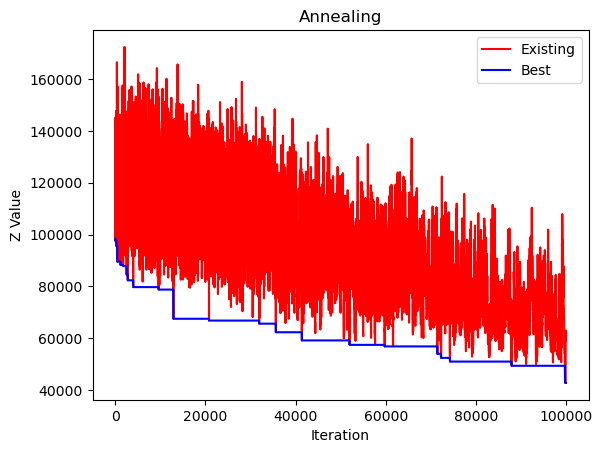

Simulated annealing with 3-swap neighborhood for 100000 iterations.
Execution time: 4.58 seconds 

Best solution using Hill Climbing: 
 ['ECU', 'PER', 'BOL', 'COL', 'BRA', 'PAR', 'ARG', 'HON', 'CUB', 'CAN', 'HAI', 'PAN', 'COS', 'GUA', 'BHM', 'VEN', 'TRI', 'POR', 'IRE', 'UK', 'FRN', 'NOR', 'FIN', 'EST', 'SWD', 'POL', 'HUN', 'AUS', 'GMY', 'CZE', 'SPN', 'SWZ', 'GRC', 'ICE', 'MEX', 'BLZ']
Z best using Hill Climbing:  42733 



In [329]:
annealing(maxiter=100000,swap=3, runstatus = False, graph = True)

#### Part 6.1.3 2-swap neighborhood, 1,000,000 iterations.

In [331]:
annealing(maxiter=1000000,swap=2, runstatus = False, graph = False)

Simulated annealing with 2-swap neighborhood for 1000000 iterations.
Execution time: 44.00 seconds 

Best solution using Hill Climbing: 
 ['CUB', 'COS', 'BHM', 'CAN', 'MEX', 'HON', 'BLZ', 'GUA', 'PAN', 'COL', 'ECU', 'PER', 'BOL', 'PAR', 'ARG', 'BRA', 'VEN', 'TRI', 'HAI', 'IRE', 'UK', 'POR', 'SPN', 'SWZ', 'FRN', 'POL', 'HUN', 'GRC', 'AUS', 'CZE', 'GMY', 'NOR', 'FIN', 'SWD', 'EST', 'ICE']
Z best using Hill Climbing:  33687 



#### Part 6.1.4 3-swap neighborhood, 1,000,000 iterations.

In [332]:
annealing(maxiter=1000000,swap=3, runstatus = False, graph = False)

Simulated annealing with 3-swap neighborhood for 1000000 iterations.
Execution time: 43.89 seconds 

Best solution using Hill Climbing: 
 ['CUB', 'TRI', 'VEN', 'COL', 'GUA', 'PAN', 'HAI', 'BHM', 'BLZ', 'COS', 'ECU', 'ARG', 'BOL', 'BRA', 'PAR', 'PER', 'HON', 'MEX', 'ICE', 'EST', 'FIN', 'SWD', 'POL', 'HUN', 'GRC', 'SWZ', 'AUS', 'NOR', 'IRE', 'UK', 'SPN', 'POR', 'FRN', 'GMY', 'CZE', 'CAN']
Z best using Hill Climbing:  38753 



#### Part 6.1.5 2-swap neighborhood, 10,000,000 iterations.

In [333]:
annealing(maxiter=10000000,swap=2, runstatus = False, graph = False)

Simulated annealing with 2-swap neighborhood for 10000000 iterations.
Execution time: 440.04 seconds 

Best solution using Hill Climbing: 
 ['VEN', 'TRI', 'BOL', 'BRA', 'PAR', 'ARG', 'PER', 'ECU', 'PAN', 'COL', 'COS', 'HON', 'GUA', 'BLZ', 'HAI', 'BHM', 'MEX', 'CUB', 'CAN', 'UK', 'IRE', 'FRN', 'SWZ', 'GRC', 'GMY', 'NOR', 'EST', 'FIN', 'SWD', 'POL', 'HUN', 'AUS', 'CZE', 'POR', 'SPN', 'ICE']
Z best using Hill Climbing:  33929 



#### Part 6.1.6 3-swap neighborhood, 10,000,000 iterations.

In [334]:
annealing(maxiter=10000000,swap=3, runstatus = False, graph = False)

Simulated annealing with 3-swap neighborhood for 10000000 iterations.
Execution time: 447.70 seconds 

Best solution using Hill Climbing: 
 ['PAN', 'MEX', 'HON', 'HAI', 'TRI', 'ECU', 'BOL', 'VEN', 'CAN', 'ICE', 'IRE', 'CZE', 'GRC', 'AUS', 'EST', 'FIN', 'SWD', 'POL', 'NOR', 'GMY', 'HUN', 'SWZ', 'SPN', 'FRN', 'UK', 'POR', 'BRA', 'PAR', 'ARG', 'PER', 'COL', 'COS', 'GUA', 'BLZ', 'BHM', 'CUB']
Z best using Hill Climbing:  38932 



#### Part 6.1.7 Whether or not 10,000,000 is better?
Run with both neighborhoods 100 times for 100,000 iterations with random restarts in between.

**Results:**
- I ran 2-swap neighborhood.
- 100 times with 100,000 iterations: 433s, zbest = 31142
- 10,000,000 iterations: 440s, zbest = 33929
- It seems like 100 times with 100,000 iterations does better than 10,000,000 iterations.

In [342]:
annealingwithruns(maxiter=100000, swap=2, runs = 100, runstatus = False, graph = False)

Simulated annealing with 2-swap neighborhood for 100000 iterations.
Execution time: 433.59 seconds 

Best solution using Hill Climbing: 
 ['HAI', 'PAN', 'CUB', 'BHM', 'BLZ', 'MEX', 'GUA', 'HON', 'COS', 'COL', 'ECU', 'PER', 'BOL', 'BRA', 'ARG', 'PAR', 'VEN', 'TRI', 'SPN', 'POR', 'GMY', 'NOR', 'SWD', 'FIN', 'EST', 'POL', 'CZE', 'SWZ', 'HUN', 'GRC', 'AUS', 'UK', 'FRN', 'IRE', 'ICE', 'CAN']
Z best using Hill Climbing:  31142 

